# Neural Network: Step by step

In [133]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py   #store vast amounts of numerical data and easily manipulate that data from NumPy
#from dnn_utils import sigmoid, sigmoid_backward, relu, relu_backward

import scipy
from PIL import Image
from scipy import ndimage

import tensorflow as tf
from tensorflow.keras import layers, models

import copy
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load and Process the Dataset

In [135]:
def load_data():
    
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_y = train_set_y_orig.reshape((train_set_y_orig.shape[0], 1))
    test_y = test_set_y_orig.reshape((test_set_y_orig.shape[0], 1))
    
    return train_x_orig, train_y, test_x_orig, test_y, classes



In [137]:
# Example of a picture
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()
#index = 10
#plt.imshow(train_x_orig[index])
#print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [139]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (209, 1)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (50, 1)


In [141]:
# Reshape the training and test examples 
#train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
#test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
#train_x = train_x_flatten/255.
#test_x = test_x_flatten/255.

train_x = train_x_orig/255.
test_x = test_x_orig/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (209, 64, 64, 3)
test_x's shape: (50, 64, 64, 3)


In [167]:
model = models.Sequential([
    layers.Flatten(input_shape=(64, 64, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='sigmoid')  # 10 classes
])

In [169]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [171]:
epochs=50
history = model.fit(
    train_x, train_y,
    epochs=epochs,
    batch_size=64,
    validation_split=0.2
)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.2734 - loss: 2.8816 - val_accuracy: 0.6905 - val_loss: 0.6461
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.6428 - loss: 2.6629 - val_accuracy: 0.7143 - val_loss: 1.9253
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5725 - loss: 3.0591 - val_accuracy: 0.6190 - val_loss: 0.8254
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.6269 - loss: 1.7729 - val_accuracy: 0.7143 - val_loss: 1.9671
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.6446 - loss: 1.9857 - val_accuracy: 0.5238 - val_loss: 0.7561
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.6012 - loss: 1.9331 - val_accuracy: 0.7143 - val_loss: 0.6820
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.6299 - loss: 1.2999 - val_accuracy: 0.7143 - val_loss: 0.7301
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.6119 - loss: 1.4135 - val_accuracy: 0.5000 - val_loss: 0.8629

In [173]:
test_loss, test_acc = model.evaluate(test_x, test_y, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")

2/2 - 0s - 21ms/step - accuracy: 0.5600 - loss: 0.7641

Test accuracy: 0.56


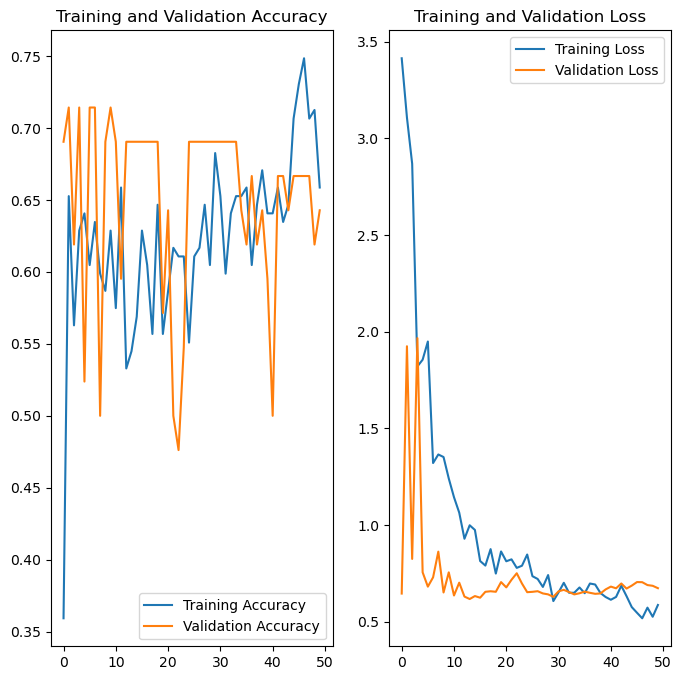

In [175]:
#Accuracy 
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
  
#loss 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
  
#epochs  
epochs_range = range(epochs) 
  
#Plotting graphs 
plt.figure(figsize=(8, 8)) 
plt.subplot(1, 2, 1) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 
  
plt.subplot(1, 2, 2) 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.show() 

#### Training and validation accuracy increases while training and validation loss decrease.
Accuracy is a measure of how well a model can predict the correct output given the input.
Training loss reflects how well a model fits the training data, while validation loss indicates how well the model generalizes to new, unseen data.
Ideally, the training loss should decrease as the model learns and its predictions improve. 

In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [179]:
model = Sequential(
    [ 
        Flatten(input_shape=(64, 64, 3)),
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')    # < softmax activation here
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['accuracy']
)

model.fit(
    train_x, train_y,
    epochs=epochs 
)

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4240 - loss: 1.2227  
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5356 - loss: 0.7917 
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5561 - loss: 0.7280 
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6583 - loss: 0.6741 
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6665 - loss: 0.6179 
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6729 - loss: 0.5897 
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6858 - loss: 0.5872 
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6418 - loss: 0.6471 
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6506 - loss: 0.6896 
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6785 - loss: 0.5875
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7132 - loss: 0.5878 
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6479 - loss: 0.5878 


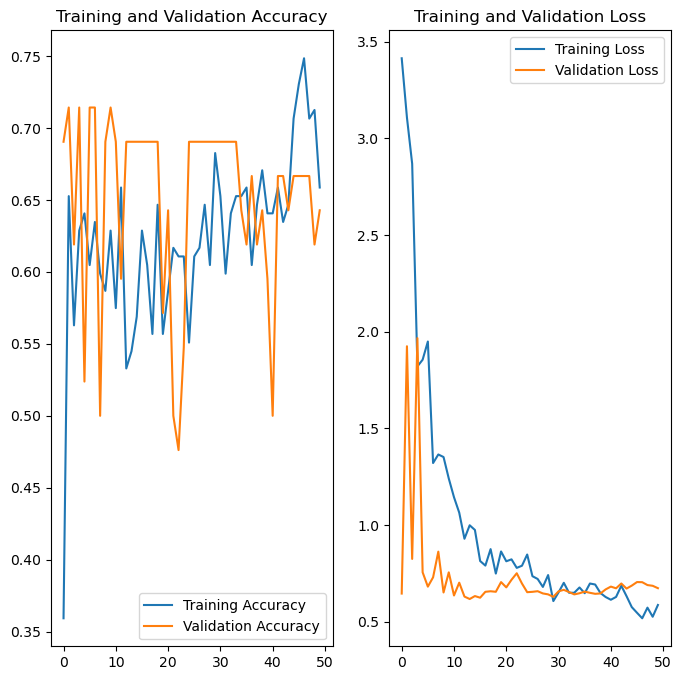

In [183]:
#Accuracy 
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
  
#loss 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
  
#epochs  
epochs_range = range(epochs) 
  
#Plotting graphs 
plt.figure(figsize=(8, 8)) 
plt.subplot(1, 2, 1) 
plt.plot(epochs_range, acc, label='Training Accuracy') 
plt.plot(epochs_range, val_acc, label='Validation Accuracy') 
plt.legend(loc='lower right') 
plt.title('Training and Validation Accuracy') 
  
plt.subplot(1, 2, 2) 
plt.plot(epochs_range, loss, label='Training Loss') 
plt.plot(epochs_range, val_loss, label='Validation Loss') 
plt.legend(loc='upper right') 
plt.title('Training and Validation Loss') 
plt.show() 

### Conclusion: 
The graph shows the accuracy increases, reflecting improved model predictions on the evaluated data and loss decreases (indicating better model performance on the training data). 